In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import petl as etl
import seaborn as sns
import petlx.bio
import scipy
import numpy as np

In [13]:
bf_tbl = pd.read_csv('/home/randomx/Dropbox/Ag1000G_carlo/notebooks/tables/hka/BFcol_vs_BFgam/putative_directional_selection_beta.tab', sep="\t")

In [14]:
gh_tbl = pd.read_csv('/home/randomx/Dropbox/Ag1000G_carlo/notebooks/tables/hka/GHcol_vs_GHgam/putative_directional_selection_beta.tab', sep="\t")

In [15]:
gn_tbl = pd.read_csv('/home/randomx/Dropbox/Ag1000G_carlo/notebooks/tables/hka/GNcol_vs_GNgam/putative_directional_selection_beta.tab', sep="\t")

In [16]:
tbl1 = pd.merge(bf_tbl, gh_tbl, on='gene', how='inner')


In [17]:
tbl_all = pd.merge(tbl1, gn_tbl, on='gene', how='inner')
tbl_all

,chrom_x,gene,segreg_c_x,pri_der_fix_c_x,score_c_x,segreg_g_x,pri_der_fix_g_x,score_g_x,score_tot_x,chrom_y,...,score_g_y,score_tot_y,chrom,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g,score_tot
0,X,AGAP013341,37,10,116.282513,33,4,19.947474,136.229988,X,...,34.296035,143.259249,X,4,10,141.816646,6,4,37.270700,179.087346
1,3R,AGAP007732,525,25,57.495478,616,31,73.720753,131.216231,3R,...,141.691889,221.200080,3R,63,24,132.260951,90,33,244.017154,376.278105
2,X,AGAP001076,119,10,40.552544,80,10,58.350971,98.903515,X,...,74.596131,122.777418,X,14,9,68.116368,11,10,128.420818,196.537186
3,3R,AGAP007736,1966,29,15.058508,2256,47,37.867951,52.926459,3R,...,77.808831,136.794567,3R,476,31,29.604631,401,51,146.455238,176.059869
4,X,AGAP001026,32,5,33.400137,38,4,17.498013,50.898150,X,...,25.002856,59.528751,X,5,5,44.844626,7,4,33.835459,78.680085
5,3R,AGAP007731,146,10,33.031688,194,8,14.944520,47.976208,3R,...,51.809349,115.169803,3R,13,11,99.745320,27,10,71.659294,171.404614


Genes shared between sympatric populations: 

- AGAP007732 -> Solute carrier family 17, member 5 (Also in Selection Atlas https://malariagen.github.io/agam-selection-atlas/0.1-alpha2/gene/AGAP007732.html)
- AGAP013341 -> marker present in Neafsey 2010 and Aboagye-Antwi et. al 2015
- AGAP001076 -> CYP4G16 (Cytochrome P450 associated with insecticide resistance catalyzes cuticular hydrocarbon production in Anopheles gambiae)
- AGAP007736 -> Selection Atlas H12 Gabon (https://malariagen.github.io/agam-selection-atlas/0.1-alpha2/signal/H12/GAS/3/2/index.html)
- AGAP001026 -> Carboxypeptidase A  (Neafsey 2010)
- AGAP007731 -> ???

In [18]:
tbl_all.corr()

,segreg_c_x,pri_der_fix_c_x,score_c_x,segreg_g_x,pri_der_fix_g_x,score_g_x,score_tot_x,segreg_c_y,pri_der_fix_c_y,score_c_y,...,pri_der_fix_g_y,score_g_y,score_tot_y,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g,score_tot
segreg_c_x,1.000000,0.857807,-0.480502,0.999474,0.934242,0.205686,-0.292818,0.996867,0.985587,-0.075858,...,0.961137,0.347619,0.240939,0.991926,0.898436,-0.494840,0.998865,0.938490,0.438283,0.126542
pri_der_fix_c_x,0.857807,1.000000,-0.259852,0.860779,0.973645,0.561550,0.107420,0.817505,0.927782,0.188883,...,0.957615,0.746189,0.692068,0.789616,0.994017,-0.077611,0.836999,0.972098,0.790056,0.613310
score_c_x,-0.480502,-0.259852,1.000000,-0.481062,-0.435503,-0.089870,0.809002,-0.480705,-0.396583,0.848386,...,-0.461649,-0.147385,0.303676,-0.477842,-0.295418,0.809292,-0.479017,-0.447390,-0.234722,0.189671
segreg_g_x,0.999474,0.860779,-0.481062,1.000000,0.935325,0.193699,-0.300376,0.995219,0.986090,-0.069601,...,0.962478,0.348249,0.244555,0.990061,0.902540,-0.485146,0.998771,0.940450,0.436999,0.130071
pri_der_fix_g_x,0.934242,0.973645,-0.435503,0.935325,1.000000,0.494529,-0.083554,0.904697,0.968420,-0.009276,...,0.995783,0.652822,0.518698,0.882874,0.980577,-0.302453,0.918071,0.999191,0.721908,0.450893
score_g_x,0.205686,0.561550,-0.089870,0.193699,0.494529,1.000000,0.512723,0.153544,0.307442,0.015466,...,0.421666,0.905170,0.733286,0.111346,0.473883,0.145274,0.159783,0.470807,0.913152,0.820010
score_tot_x,-0.292818,0.107420,0.809002,-0.300376,-0.083554,0.512723,1.000000,-0.323767,-0.160421,0.740473,...,-0.149096,0.407174,0.694562,-0.346204,0.025020,0.783384,-0.318630,-0.107801,0.336596,0.647470
segreg_c_y,0.996867,0.817505,-0.480705,0.995219,0.904697,0.153544,-0.323767,1.000000,0.971700,-0.094767,...,0.936975,0.279071,0.176588,0.998769,0.863166,-0.534801,0.998506,0.909018,0.374333,0.055026
pri_der_fix_c_y,0.985587,0.927782,-0.396583,0.986090,0.968420,0.307442,-0.160421,0.971700,1.000000,0.044297,...,0.984576,0.471608,0.400072,0.959974,0.956827,-0.353414,0.978781,0.971747,0.547830,0.283565
score_c_y,-0.075858,0.188883,0.848386,-0.069601,-0.009276,0.015466,0.740473,-0.094767,0.044297,1.000000,...,-0.026411,0.138250,0.608029,-0.103183,0.171730,0.831795,-0.079180,-0.009782,0.057501,0.440742


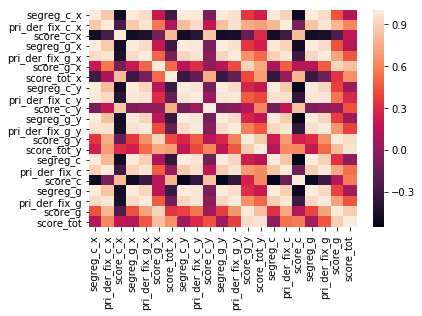

In [19]:
sns.heatmap(tbl_all.corr())

--------------------------------

In [20]:
tbl_shared = tbl_all[['chrom_x','score_tot_x', 'score_tot_y', 'score_tot']].rename(columns={"chrom_x": "chrom", "score_tot_x": 'score_bf', 'score_tot_y':'score_gh','score_tot': 'score_gn'})
tbl_shared

,chrom,score_bf,score_gh,score_gn
0,X,136.229988,143.259249,179.087346
1,3R,131.216231,221.200080,376.278105
2,X,98.903515,122.777418,196.537186
3,3R,52.926459,136.794567,176.059869
4,X,50.898150,59.528751,78.680085
5,3R,47.976208,115.169803,171.404614


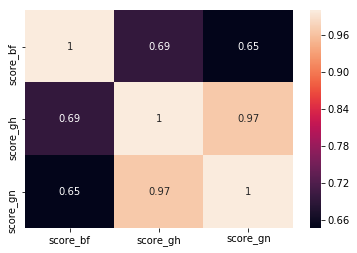

In [21]:
sns.heatmap(tbl_shared.corr(), annot=True)

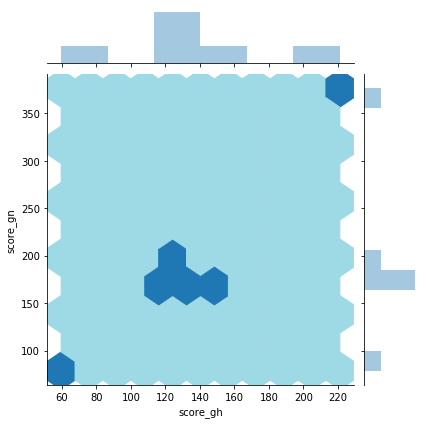

In [22]:
g = sns.jointplot("score_gh", "score_gn", data=tbl_shared, kind="hex", cmap="tab20_r")

In [23]:
def bar_plot(score1,score2,score3, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    

    # set width of bar
    barWidth = 0.25

    # set height of bar
    score_bf = score1
    score_gh = score2
    score_gn = score3

    # Set position of bar on X axis
    r1 = np.arange(len(score1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    # Make the plot
    plt.bar(r1, score_bf, color='#0080ff', width=barWidth, edgecolor='white', label='Burkina Faso')
    plt.bar(r2, score_gh, color='#557f2d', width=barWidth, edgecolor='white', label='Ghana')
    plt.bar(r3, score_gn, color='#ff9933', width=barWidth, edgecolor='white', label='Guinea')

    # Add xticks on the middle of the group bars
    plt.xlabel('Genes', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(score1))], ['AGAP007732', 'AGAP013341', 'AGAP001035', 'AGAP001076', 'AGAP007736', 'AGAP001026', 'AGAP007731'], rotation=45)
    plt.ylabel('Total Score', fontweight='bold')

    sns.despine()
    ax.set_title(title)
    # Create legend & Show graphic
    plt.legend()
    plt.show()

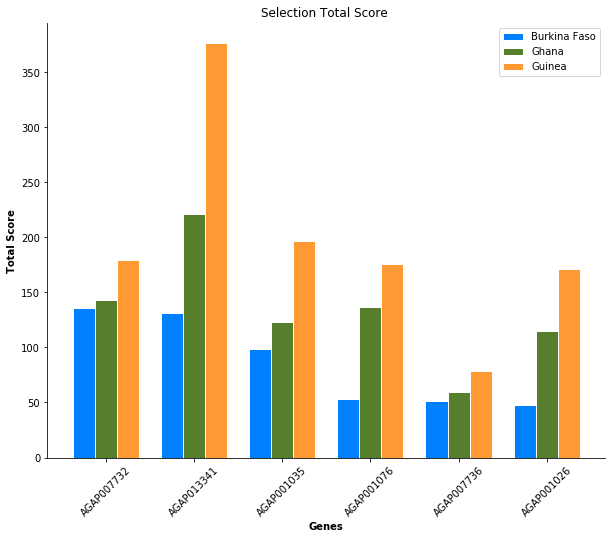

In [24]:
bar_plot(tbl_shared['score_bf'],tbl_shared['score_gh'],tbl_shared['score_gn'], 'Selection Total Score ')

-----------------------------

In [25]:
tbl_shared = tbl_all[['chrom_x','score_c_x', 'score_c_y', 'score_c']].rename(columns={"chrom_x": "chrom", "score_c_x": 'score_bf', 'score_c_y':'score_gh','score_c': 'score_gn'})
tbl_shared

,chrom,score_bf,score_gh,score_gn
0,X,116.282513,108.963213,141.816646
1,3R,57.495478,79.508191,132.260951
2,X,40.552544,48.181288,68.116368
3,3R,15.058508,58.985736,29.604631
4,X,33.400137,34.525895,44.844626
5,3R,33.031688,63.360454,99.745320


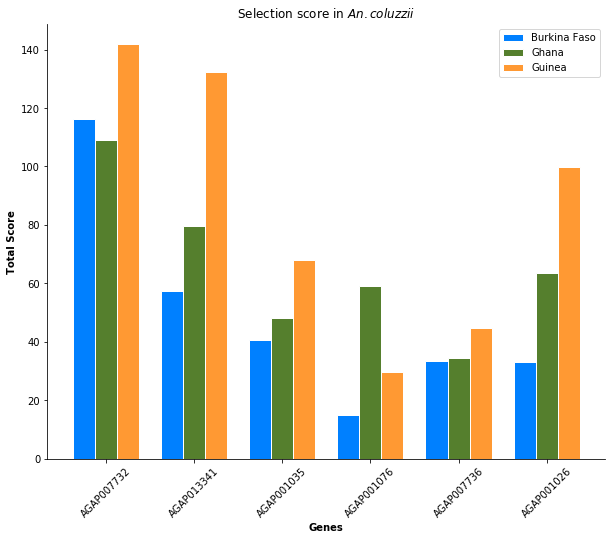

In [26]:
bar_plot(tbl_shared['score_bf'],tbl_shared['score_gh'],tbl_shared['score_gn'], 'Selection score in $\itAn.coluzzii$')

---------------------------------

In [27]:
tbl_shared = tbl_all[['chrom_x','score_g_x', 'score_g_y', 'score_g']].rename(columns={"chrom_x": "chrom", "score_g_x": 'score_bf', 'score_g_y':'score_gh','score_g': 'score_gn'})
tbl_shared

,chrom,score_bf,score_gh,score_gn
0,X,19.947474,34.296035,37.270700
1,3R,73.720753,141.691889,244.017154
2,X,58.350971,74.596131,128.420818
3,3R,37.867951,77.808831,146.455238
4,X,17.498013,25.002856,33.835459
5,3R,14.944520,51.809349,71.659294


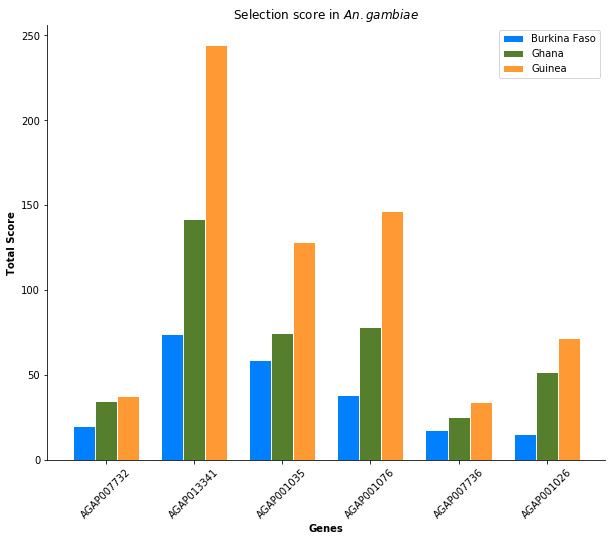

In [28]:
bar_plot(tbl_shared['score_bf'],tbl_shared['score_gh'],tbl_shared['score_gn'], "Selection score in $\it{An.gambiae}$")

---------------------------

## Genes plot

In [29]:
tbl_genes  = (etl
    .fromgff3('/mnt/70D89269D8922CFA/Genomes/genome/Anopheles-gambiae-PEST_BASEFEATURES_AgamP4.2.gff3.gz')
    .unpackdict('attributes')
    .cut(2,3,4,9)
    .select(lambda rec: rec.type == 'gene')
    .rename('ID', 'gene')
)
tbl_genes.display(10)

type,start,end,gene
gene,157348,186936,AGAP004677
gene,203779,205293,AGAP004678
gene,207894,210460,AGAP004679
gene,271285,271815,AGAP004680
gene,358329,359280,AGAP004681
gene,433503,461627,AGAP004682
gene,485698,488369,AGAP004683
gene,493039,493543,AGAP004684
gene,493579,497632,AGAP004685
gene,742004,747057,AGAP004686


In [30]:
tbl_shared = etl.fromdataframe(tbl_all)
tbl_shared

chrom_x,gene,segreg_c_x,pri_der_fix_c_x,score_c_x,segreg_g_x,pri_der_fix_g_x,score_g_x,score_tot_x,chrom_y,segreg_c_y,pri_der_fix_c_y,score_c_y,segreg_g_y,pri_der_fix_g_y,score_g_y,score_tot_y,chrom,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g,score_tot
X,AGAP013341,37,10,116.28251333200001,33,4,19.947474495599998,136.22998782759998,X,11,10,108.96321346399999,7,4,34.296035244,143.259248708,X,4,10,141.81664619999998,6,4,37.2707000598,179.0873462598
3R,AGAP007732,525,25,57.495478111000004,616,31,73.7207529799,131.2162310909,3R,125,23,79.50819145979999,162,32,141.691888767,221.2000802268,3R,63,24,132.26095075799998,90,33,244.017153823,376.278104581
X,AGAP001076,119,10,40.5525443667,80,10,58.3509711217,98.9035154884,X,36,10,48.181287615500004,26,10,74.59613053380001,122.7774181493,X,14,9,68.1163676021,11,10,128.4208181,196.5371857021
3R,AGAP007736,1966,29,15.058507732999999,2256,47,37.867950815,52.926458548,3R,663,47,58.9857363828,859,56,77.8088307414,136.7945671242,3R,476,31,29.604631019099998,401,51,146.455238388,176.0598694071
X,AGAP001026,32,5,33.4001365679,38,4,17.4980133372,50.898149905100006,X,10,5,34.5258951848,11,4,25.0028562946,59.52875147939999,X,5,5,44.8446261274,7,4,33.835459169699995,78.68008529709998


In [31]:
pos_hka_shared = tbl_shared.join(tbl_genes, key='gene').cut(0,1,26,27)
pos_hka_shared.displayall()

chrom_x,gene,start,end
X,AGAP001026,19721319,19723125
X,AGAP001076,22937392,22947129
3R,AGAP007731,13603,21758
3R,AGAP007732,24056,39486
3R,AGAP007736,82151,142545
X,AGAP013341,23797952,23801974


In [32]:
import matplotlib.patches as mpatches
gff_fn = '/mnt/70D89269D8922CFA/Genomes/genome/Anopheles-gambiae-PEST_BASEFEATURES_AgamP4.2.sorted.gff3.gz'



def plot_gene_annotation(chrom, start, stop, title, ax=None): 
    start = start - 1000
    stop = stop + 1000
    tabix_index= "%s:%s-%s" % (chrom, start, stop)
    gff = petlx.bio.gff3.fromgff3(gff_fn, tabix_index)
    tbl_features = (gff.unpackdict('attributes', ['ID'])
                .addfield('length', lambda r: r.end - r.start)
                )
    xranges_gene = tbl_features.selecteq('type', 'gene').values(['start', 'length']).list()
    xranges_exon = tbl_features.selecteq('type', 'exon').values(['start', 'length']).list()
    xranges_CDS = tbl_features.selecteq('type', 'CDS').values(['start', 'length']).list()

    if ax is None:
        # make a new figure here
        fig, ax = plt.subplots(figsize=(10,3))
        
    bar_gene= ax.broken_barh(xranges_gene, (0.125, 0.05), facecolors='#FF3333')    
    bar_exon= ax.broken_barh(xranges_exon, (0.1, 0.1), facecolors='#FFFF00', linewidth=0.2)
    bar_CDS = ax.broken_barh(xranges_CDS, (0.1, 0.1), facecolors='#0CF91C', linewidth=0.2)
   
    ax.set_title(title)
    ax.set_ylim(0,1)
    #ax.set_xlim(start-(gene_lenght/4), stop+(gene_lenght/4))
    ax.set_xlim(start, stop)
    ax.set_yticks([])
    cds_patch = mpatches.Patch(color='#0CF91C', label='CDS')
    exon_patch = mpatches.Patch(color='#FFFF00', label='Exon')
    intr_patch = mpatches.Patch(color='#FF3333', label='Intron')
    plt.legend(handles=[cds_patch, exon_patch, intr_patch],prop={'size':12})
    

    #ax.annotate('ciao', (21344460, 0.2), xycoords='data', xytext=(0,50),
                #textcoords='offset points', rotation=90, ha='center', va='bottom', color='k', 
                            #fontsize=20, arrowprops=dict(facecolor='black', shrink=0.05
                                                        #))
    sns.set(style ='ticks',font_scale=2)
    sns.despine(left=True)



In [33]:
title = pos_hka_shared['gene']

In [34]:
chrom = pos_hka_shared['chrom_x']

In [35]:
start = pos_hka_shared['start']
end = pos_hka_shared['end']

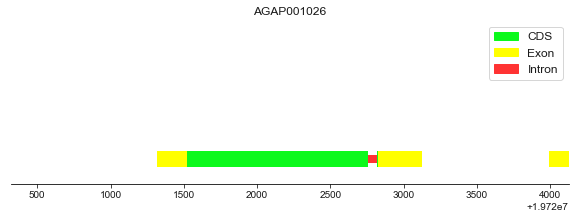

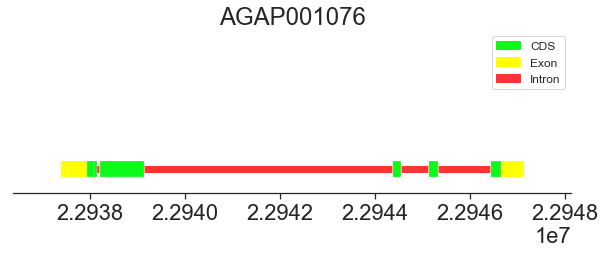

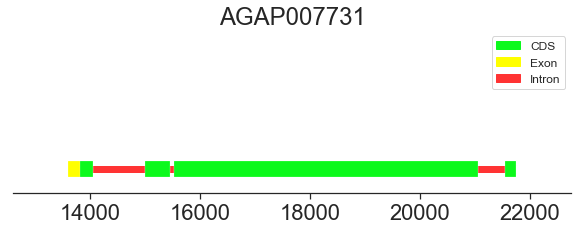

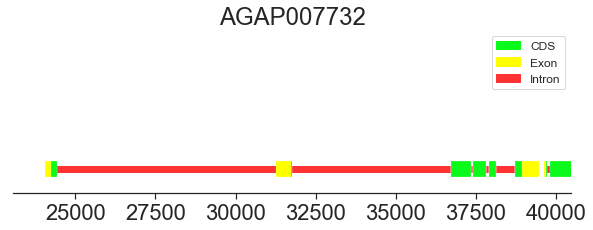

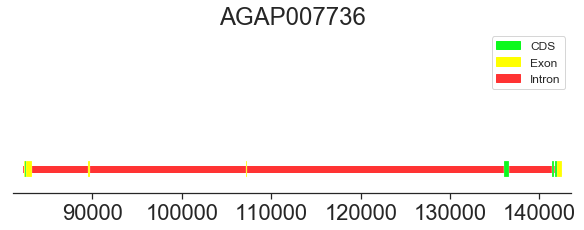

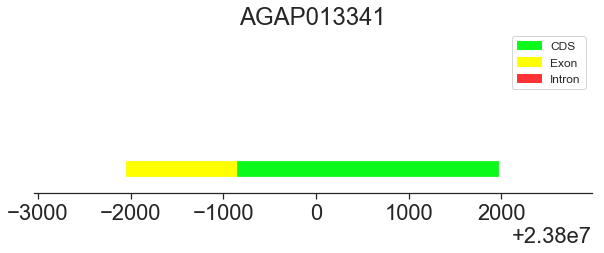

In [36]:
for i in range(len(chrom)):
    plot_gene_annotation(chrom[i], start[i], end[i], title[i])

---------------------------------